## Teen Market Segmentation using K-means clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv("C:\\Users\\CH40068799\\OneDrive - Wipro\\Documents\\Data Science\\ML projects files\\Project 10-segmentation\\snsdata.csv")
data.head()             

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


In [3]:
#Summary statistics
data.describe()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2007.500000,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,0.104933,0.087333,0.139967,0.322867,0.209400,0.141200,0.126600,0.103200,0.425167,0.299600,0.040600,0.737833,0.243333,0.465300,0.248167,0.112067,0.021333,0.422567,0.110967,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,0.521726,0.516961,0.471080,0.802441,1.123504,0.528209,0.479145,0.509338,1.162574,1.118786,0.287091,1.252366,0.720375,1.343226,0.834028,0.581709,0.204645,1.097958,0.449436,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,106.927000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,16.000000,15.000000,12.000000,18.000000,114.000000,18.000000,10.000000,26.000000,30.000000,66.000000,11.000000,64.000000,21.000000,79.000000,44.000000,30.000000,11.000000,37.000000,9.000000,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [4]:
data.describe(include='object')

,gender
count,27276
unique,2
top,F
freq,22054


In [5]:
#Treating missing values
data.isnull().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [6]:
data['gender'].value_counts()

F    22054
M     5222
Name: gender, dtype: int64

In [7]:
data['gender'].value_counts(dropna=False)

F      22054
M       5222
NaN     2724
Name: gender, dtype: int64

In [8]:
data['gender'].fillna('not disclosed', inplace=True)

In [10]:
data['gender'].isnull().sum()

0

In [11]:
data.groupby('gradyear')['age'].mean()

gradyear
2006    19.137241
2007    18.391459
2008    17.523867
2009    16.876025
Name: age, dtype: float64

In [13]:
data['age']=data.groupby('gradyear').transform(lambda x: x.fillna(x.mean()))

In [14]:
data['age'].isnull().sum()

0

In [15]:
data.isnull().sum()

gradyear        0
gender          0
age             0
friends         0
basketball      0
football        0
soccer          0
softball        0
volleyball      0
swimming        0
cheerleading    0
baseball        0
tennis          0
sports          0
cute            0
sex             0
sexy            0
hot             0
kissed          0
dance           0
band            0
marching        0
music           0
rock            0
god             0
church          0
jesus           0
bible           0
hair            0
dress           0
blonde          0
mall            0
shopping        0
clothes         0
hollister       0
abercrombie     0
die             0
death           0
drunk           0
drugs           0
dtype: int64

C:\Users\CH40068799\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

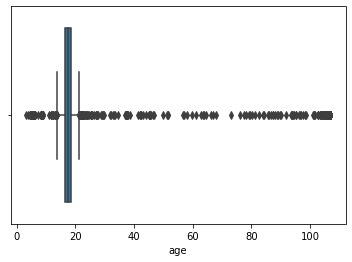

In [16]:
#Treating Outliers
sns.boxplot(data['age'])

In [18]:
q1=data['age'].quantile(0.25)
q3=data['age'].quantile(0.75)
iqr=q3-q1
print(iqr)

1.887459224069687


In [23]:
df=data[(data['age']>(q1-1.5*iqr))&(data['age']<(q3+1.5*iqr))]

In [24]:
df['age'].describe()

count    29633.000000
mean        17.377469
std          1.147764
min         13.719000
25%         16.501000
50%         17.426000
75%         18.387000
max         21.158000
Name: age, dtype: float64

In [25]:
df.shape

(29633, 40)

In [26]:
data['age'].shape

(30000,)

C:\Users\CH40068799\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

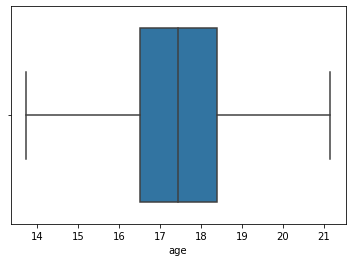

In [27]:
sns.boxplot(df['age'])

In [28]:
#Data Preprocessing
names=df.columns[5:40]
scaled_feature=data.copy()
names

Index(['football', 'soccer', 'softball', 'volleyball', 'swimming',
       'cheerleading', 'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy',
       'hot', 'kissed', 'dance', 'band', 'marching', 'music', 'rock', 'god',
       'church', 'jesus', 'bible', 'hair', 'dress', 'blonde', 'mall',
       'shopping', 'clothes', 'hollister', 'abercrombie', 'die', 'death',
       'drunk', 'drugs'],
      dtype='object')

In [29]:
features=scaled_feature[names]

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(features.values)

In [32]:
scaled_feature[names]=features
scaled_feature.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006,not disclosed,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


In [33]:
def gender_to_numeric(x):
    if x=='M':
        return 1
    if x=='F':
        return 2
    if x=='not disclosed':
        return 3

In [34]:
scaled_feature['gender']=scaled_feature['gender'].apply(gender_to_numeric)
scaled_feature['gender'].head()

0    1
1    2
2    1
3    2
4    3
Name: gender, dtype: int64

In [35]:
scaled_feature.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,1,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,2,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,2006,1,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2006,2,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006,3,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


In [36]:
#Building the K-means model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0, n_jobs=-1)

In [37]:
model = kmeans.fit(scaled_feature)

C:\Users\CH40068799\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


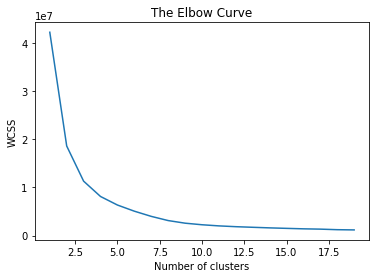

In [41]:
# Creating a funtion with KMeans to plot "The Elbow Curve"
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(scaled_feature)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
plt.show()

In [42]:
#fit k-means clustering for k=5
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_feature)

KMeans(n_clusters=5)

In [43]:
len(kmeans.labels_)

30000

In [44]:
data['cluster']=kmeans.labels_

In [45]:
data.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006,not disclosed,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,0


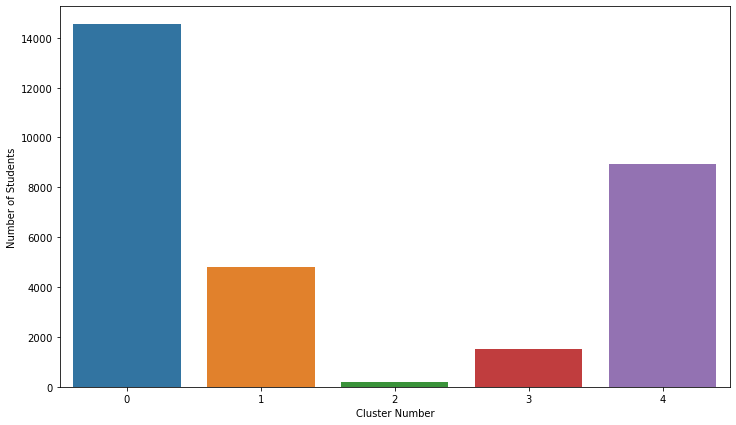

In [48]:
#Interpreting clustering results
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1),y=data.groupby(['cluster']).count()['age'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of Students")

In [49]:
size_array=list(data.groupby(['cluster']).count()['age'].values)
size_array

[14536, 4816, 195, 1502, 8951]

In [50]:
data.groupby(['cluster']).mean()[['basketball', 'football','soccer', 'softball','volleyball','swimming','cheerleading','baseball','tennis','sports','cute','sex','sexy','hot','kissed','dance','band','marching','music','rock','god','church','jesus','bible','hair','dress','blonde','mall','shopping','clothes','hollister','abercrombie','die', 'death','drunk','drugs']]

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.223308,0.229018,0.191387,0.121423,0.109177,0.115094,0.085718,0.091566,0.080627,0.127683,0.272565,0.206728,0.127408,0.108214,0.096313,0.362548,0.269813,0.035498,0.680930,0.221863,0.409741,0.200812,0.091428,0.018368,0.395707,0.095487,0.080696,0.218148,0.296574,0.135182,0.054554,0.039970,0.177353,0.101679,0.084067,0.064461
1,0.322674,0.280316,0.267857,0.236711,0.182724,0.156977,0.133513,0.127699,0.094477,0.149294,0.394934,0.209925,0.164452,0.149502,0.116902,0.491279,0.311254,0.045473,0.780731,0.280108,0.545473,0.320598,0.145349,0.024502,0.443729,0.129360,0.105689,0.307101,0.433762,0.168605,0.097176,0.074958,0.177741,0.124377,0.087209,0.057932
2,0.302564,0.251282,0.276923,0.200000,0.215385,0.205128,0.174359,0.133333,0.076923,0.128205,0.441026,0.189744,0.215385,0.158974,0.148718,0.451282,0.338462,0.061538,0.661538,0.200000,0.594872,0.292308,0.087179,0.005128,0.630769,0.174359,0.128205,0.312821,0.553846,0.179487,0.123077,0.158974,0.189744,0.153846,0.117949,0.046154
3,0.382157,0.302264,0.266977,0.267643,0.199734,0.147137,0.202397,0.132490,0.093875,0.144474,0.468708,0.215047,0.183089,0.197736,0.107856,0.602530,0.299601,0.042610,0.796272,0.256325,0.653129,0.392144,0.165113,0.031292,0.511318,0.151798,0.126498,0.419441,0.488682,0.165113,0.123835,0.083222,0.201731,0.133156,0.109854,0.054594
4,0.289018,0.266674,0.240867,0.166462,0.165903,0.149927,0.108591,0.109150,0.093509,0.154396,0.338733,0.212937,0.142442,0.131494,0.105240,0.460954,0.340856,0.045470,0.799017,0.257178,0.478047,0.260976,0.119316,0.023126,0.435370,0.117976,0.119651,0.265892,0.374036,0.155849,0.069825,0.048821,0.195397,0.125126,0.090381,0.056530


The row refers to the five clusters, the numbers accross